## Sprint: Qualidade de Software, Segurança e Sistemas Inteligentes
## MVP Problema de Classificação: Prevenção de Infarto | Engenharia de Software.


In [3]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import random
import joblib

## Carga do Dataset

In [5]:
# URL de importação do dataset
url = "https://raw.githubusercontent.com/gabrigon0706/prevencao_infarto_database/e6907641216e33e3535293e3f8562e96b34021eb/prevencao_infarto.csv"


# Leitura do arquivo
dataset = pd.read_csv(url, sep=',')

# Exibe primeiras linhas do dataset
dataset.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Diet,Previous Heart Problems,Medication Use,Stress Level,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,1,208,72,0,0,1,0,0,1,0,0,9,286,0,6,0
1,21,1,389,98,1,1,1,1,1,2,1,0,1,235,1,7,0
2,21,0,324,72,1,0,0,0,0,0,1,1,9,587,4,4,0
3,84,1,383,73,1,1,1,0,1,1,1,0,9,378,3,4,0
4,66,1,318,93,1,1,1,1,0,2,1,0,6,231,1,5,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [6]:
# Definindo o tamanho do conjunto de teste
test_size = 0.30

# Definindo a semente aleatória para reprodutibilidade
seed = 7

# Convertendo o conjunto de dados para um array numpy
array = dataset.values

# Selecionando as características (X) e a variável alvo (y) no array
X = array[:, 0:16]  # Seleciona as colunas de 0 a 15 como características
y = array[:, 16]    # Seleciona a última coluna (índice 16) como variável alvo

# Dividindo o conjunto de dados em conjuntos de treino e teste usando a função train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y)  # Realiza o holdout com estratificação

# Configurando parâmetros e partições para a validação cruzada
scoring = 'accuracy'  # Métrica de avaliação
num_particoes = 2    # Número de partições para validação cruzada
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)  # Configurando validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.565536 (0.009292)
CART: 0.544017 (0.006358)
NB: 0.641832 (0.000163)
SVM: 0.641832 (0.000163)


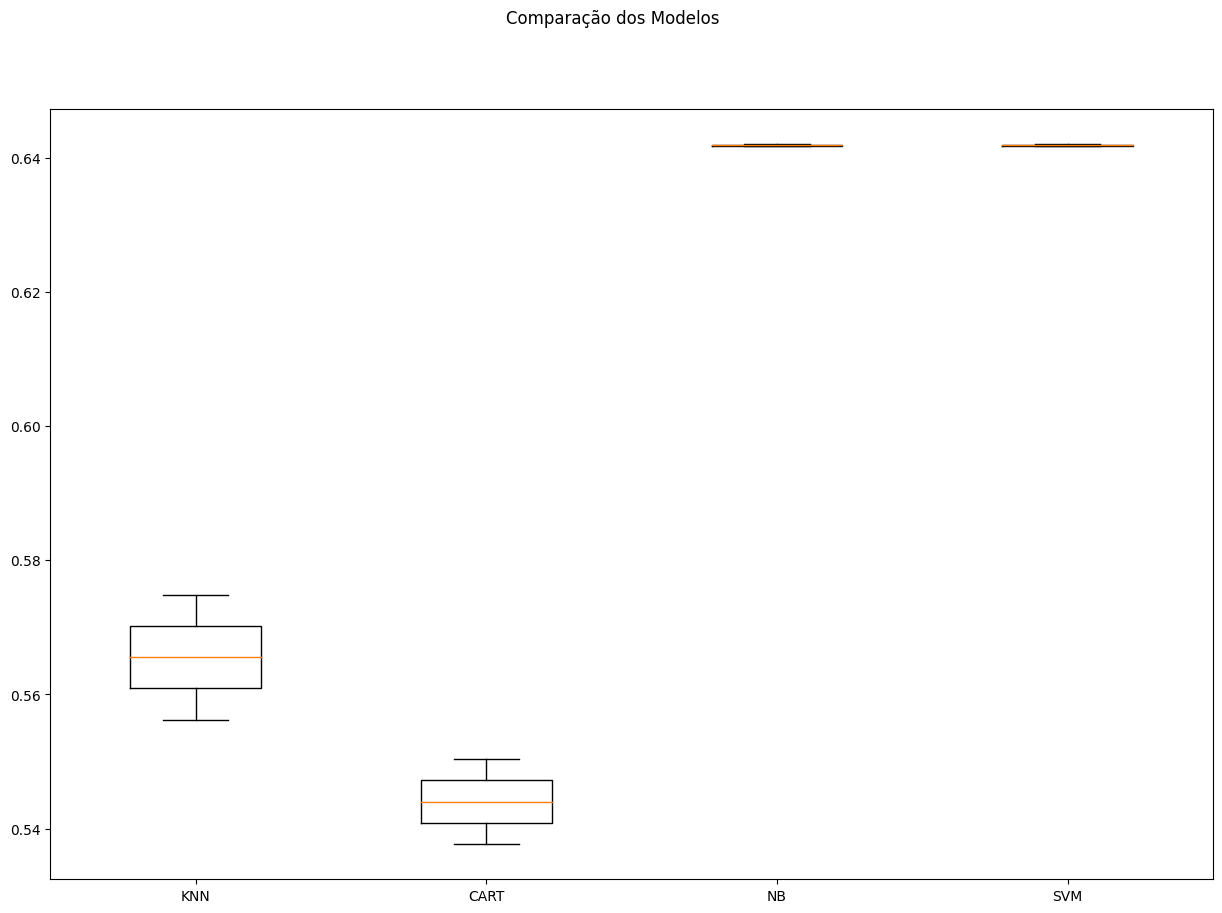

In [13]:
# Definindo uma semente global para reprodutibilidade
np.random.seed(7)

# Lista que armazenará os modelos
models = []

# Criando e adicionando modelos à lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados da validação cruzada
results = []
names = []

# Avaliando o desempenho dos modelos
for name, model in models:
    # Utilizando a validação cruzada para obter métricas de desempenho
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

    # Armazenando resultados e nomes dos modelos
    results.append(cv_results)
    names.append(name)

    # Exibindo métricas de desempenho para cada modelo
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Criando um boxplot para comparar os modelos
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN: 0.565536 (0.009292)
CART: 0.544017 (0.006358)
NB: 0.641832 (0.000163)
SVM: 0.641832 (0.000163)


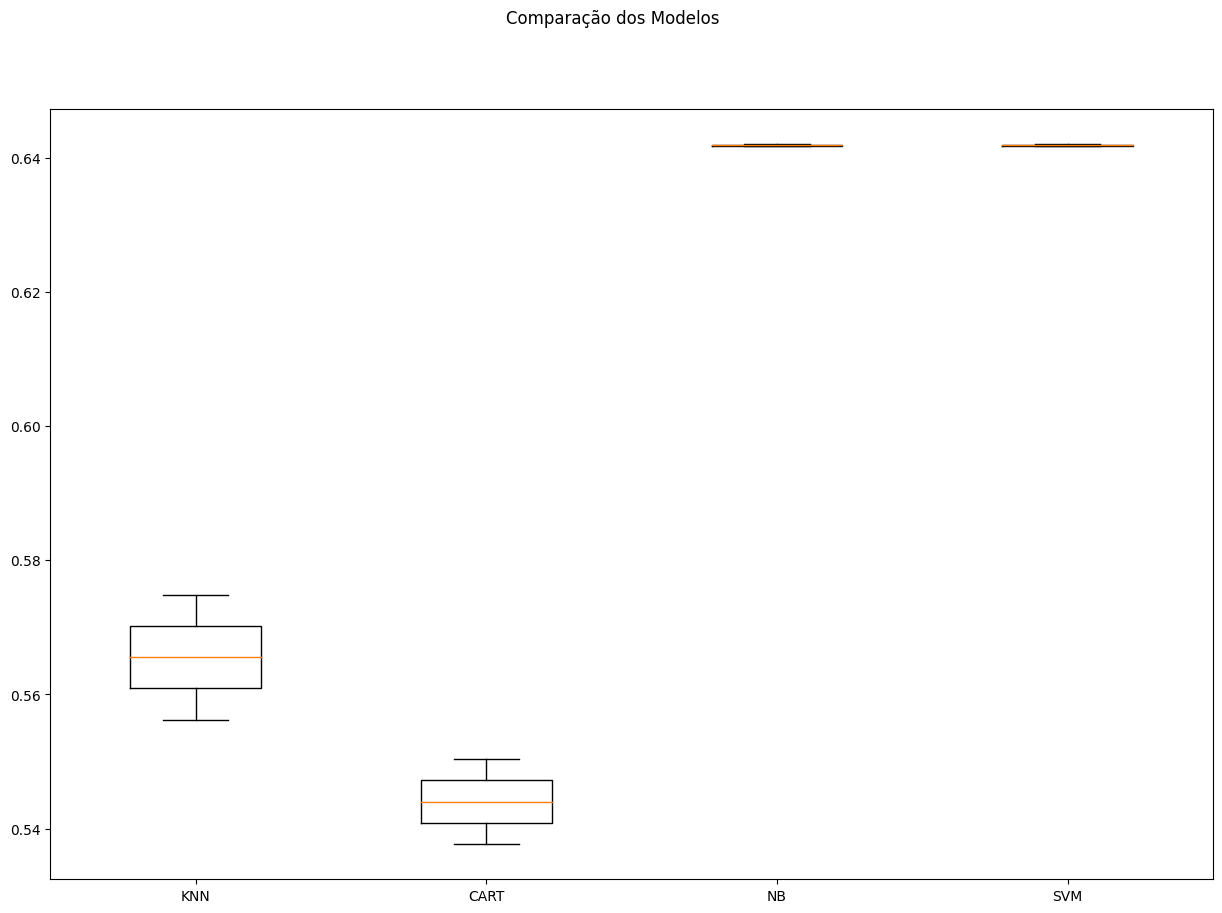

In [14]:
# Definindo uma semente global para reprodutibilidade
np.random.seed(7)

# Lista que armazenará os modelos
models = []

# Criando e adicionando modelos à lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados da validação cruzada
results = []
names = []

# Avaliando o desempenho dos modelos
for name, model in models:
    # Utilizando a validação cruzada para obter métricas de desempenho
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

    # Armazenando resultados e nomes dos modelos
    results.append(cv_results)
    names.append(name)

    # Exibindo métricas de desempenho para cada modelo
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Criando um boxplot para comparar os modelos
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Otimização dos hiperparâmetros

In [12]:
 # Definindo uma semente global para reprodutibilidade
np.random.seed(7)

# Definindo os componentes do pipeline para o Naive Bayes (NB)
nb = GaussianNB()
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Criando pipelines para o NB com diferentes transformações
pipelines_nb = [
    ('nb-orig', Pipeline(steps=[('nb', nb)])),
    ('nb-padr', Pipeline(steps=[('scaler', standard_scaler), ('nb', nb)])),
    ('nb-norm', Pipeline(steps=[('min_max_scaler', min_max_scaler), ('nb', nb)])),
]

# Não é necessário definir parâmetros para tuning do NB, pois ele não possui hiperparâmetros significativos para otimização

# Preparando e executando o GridSearchCV para o NB
for name, model in pipelines_nb:
    # Configurando GridSearchCV com o modelo do pipeline
    grid_nb = GridSearchCV(estimator=model, param_grid={}, scoring=scoring, cv=kfold)

    # Ajustando o GridSearchCV com os dados de treino
    grid_nb.fit(X_train, y_train)

    # Imprimindo a melhor configuração e desempenho
    print(f'Tratamento: {name} - Melhor Acurácia: {grid_nb.best_score_:.3f}')

Tratamento: nb-orig - Melhor Acurácia: 0.642
Tratamento: nb-padr - Melhor Acurácia: 0.642
Tratamento: nb-norm - Melhor Acurácia: 0.642


## Finalização do Modelo

In [15]:
# Avaliação do modelo Naive Bayes (NB) com o conjunto de testes

# Preparação do modelo Naive Bayes
model_nb_original = GaussianNB()  # Inicializa um modelo Naive Bayes
model_nb_original.fit(X_train, y_train)  # Treina o modelo com os dados de treino

# Estimativa da acurácia no conjunto de teste
predictions_nb_original = model_nb_original.predict(X_test)  # Realiza previsões no conjunto de teste
accuracy_nb_original = accuracy_score(y_test, predictions_nb_original)  # Calcula a acurácia
print(f'Acurácia do Naive Bayes (sem padronização) no conjunto de teste: {accuracy_nb_original:.3f}')



Acurácia do Naive Bayes (sem padronização) no conjunto de teste: 0.642


In [17]:
# Preparação do modelo com TODO o dataset

# Ajuste do scaler com TODOS os dados
scaler = StandardScaler().fit(X)  # Inicializa e ajusta o scaler usando o conjunto de dados completo (X)

# Aplicação da padronização em TODOS os dados
rescaledX = scaler.transform(X)  # Utiliza o scaler ajustado para padronizar o conjunto de dados completo (X)

# Treinamento do modelo com os dados padronizados
model.fit(rescaledX, y)  # Treina o modelo usando os dados padronizados (rescaledX) e a variável alvo (y)


SVC()

## Simulando a aplicação do modelo em dados não vistos

In [18]:
# Função para mostrar dados aleatórios
def mostrar_dados_aleatorios(dados_aleatorios):
    for i, dados_aleatorio in enumerate(dados_aleatorios):
        print(f"Simulação {i + 1}: \n")
        for atributo, valor in dados_aleatorio.items():
            print(f"{atributo}: {valor}")
        print("\n")

# Gerando dados aleatórios para simulação
num_simulacoes = 2
dados_simulados = []

# Lista de atributos e intervalos permitidos
atributos = {
    'Informe a sua idade': (18, 99),
    'Informe o sexo': (0, 1),
    'Informe o nível de colesterol': (120, 400),
    'Informe batimento cardíaco em repouso': (40, 110),
    'Possui diabetes': (0, 1),
    'Tem histórico de infarto cardíaco na família': (0, 1),
    'É fumante': (0, 1),
    'É obeso': (0, 1),
    'Faz consumo de ácool com frequência': (0, 1),
    'Como é sua alimentação': (0, 2),
    'Tem algum problema cardíaco': (0, 1),
    'Faz uso de medicamento contínuo': (0, 1),
    'Informe seu nível de estresse no dia a dia': (0, 10),
    'Informe o valor de triglicerídeos': (30, 800),
    'Informe dias na semana realiza atividade física': (0, 7),
    'Informe horas de sono por dia': (4, 10),
}

# Loop para gerar dados simulados
for _ in range(num_simulacoes):
    # Dicionário para armazenar dados simulados para cada atributo
    dados_simulacao = {atributo: random.randint(intervalo[0], intervalo[1]) for atributo, intervalo in atributos.items()}

    # Adiciona os dados simulados à lista
    dados_simulados.append(dados_simulacao)

# Convertendo dados simulados para DataFrame
entrada_simulada = pd.DataFrame(dados_simulados, columns=atributos)

# Convertendo os dados simulados para array
array_entrada_simulada = entrada_simulada.values
X_entrada_simulada = array_entrada_simulada.astype(float)  # Garante que todos os atributos são numéricos

# Padronização nos dados de entrada usando o scaler treinado em X_train
rescaledEntradaSimuladaX = scaler.transform(X_entrada_simulada)

# Definindo e treinando o modelo Naive Bayes
model_nb = GaussianNB()  # Inicializa o modelo Naive Bayes
model_nb.fit(X_train, y_train)  # Treina o modelo com os dados de treino

# Mostrando dados aleatórios
print("\nDados Aleatórios: \n")
mostrar_dados_aleatorios(dados_simulados)


Dados Aleatórios: 

Simulação 1: 

Qual sua idade: 19
Qual o seu sexo: 1
Qual seu nível de colesterol: 375
Qual seu batimento cardíaco em repouso: 54
Possui diabetes: 1
Tem histórico de infarto cardíaco na família: 0
É fumante: 0
É obeso: 0
Faz consumo de ácool com frequência: 1
Como é sua alimentação: 2
Tem algum problema cardíaco: 0
Faz uso de medicamento contínuo: 0
Qual seu nível de estresse no dia a dia: 3
Qual o valor de triglicerídeos: 408
Quantos dias na semana realiza atividade física: 2
Quantas horas de sono por dia: 9


Simulação 2: 

Qual sua idade: 43
Qual o seu sexo: 1
Qual seu nível de colesterol: 197
Qual seu batimento cardíaco em repouso: 105
Possui diabetes: 1
Tem histórico de infarto cardíaco na família: 0
É fumante: 0
É obeso: 1
Faz consumo de ácool com frequência: 0
Como é sua alimentação: 1
Tem algum problema cardíaco: 0
Faz uso de medicamento contínuo: 1
Qual seu nível de estresse no dia a dia: 2
Qual o valor de triglicerídeos: 634
Quantos dias na semana realiza

In [19]:
# Fazendo previsões com o modelo Naive Bayes treinado
previsoes_simuladas = model_nb.predict(rescaledEntradaSimuladaX)

# Exibindo as previsões
for i, previsao in enumerate(previsoes_simuladas):
    print(f"Simulação {i + 1}: Previsão de Classe {previsao}")

Simulação 1: Previsão de Classe 1
Simulação 2: Previsão de Classe 1


## Gerando o arquivo .pkl do modelo treinado

In [20]:
# Salvar o modelo
joblib.dump(model_nb, 'modelo_naive_bayes.pkl')

# Salvar o scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

# Resumo do Processo:

## Carregamento e Exploração dos Dados:

Os dados foram carregados a partir de uma URL e explorados para entender a estrutura e os tipos de variáveis presentes.

## Pré-processamento e Divisão dos Dados:

Foram realizadas etapas de pré-processamento, incluindo a divisão do conjunto de dados em conjuntos de treino e teste, estratificados para manter a proporção de classes.

## Seleção de Modelos:

Foram escolhidos quatro modelos de classificação: KNN (k-Nearest Neighbors), Decision Tree, Naive Bayes e SVM (Support Vector Machine).

## Avaliação do Desempenho dos Modelos:

Utilizou-se a validação cruzada para avaliar o desempenho dos modelos em termos de acurácia média e variabilidade.

## Escolha do Modelo Naive Bayes:

O modelo Naive Bayes foi escolhido com base no desempenho médio durante a validação cruzada. Foi observado que o Naive Bayes apresentou uma exatidão média sólida, mesmo que simples, e uma variabilidade muito baixa nos resultados.

##Pipeline e Transformações nos Dados:

Criou-se pipelines para o Naive Bayes com diferentes transformações nos dados (original, padronizado com StandardScaler, normalizado com MinMaxScaler), embora as transformações não tenham impacto nos resultados finais.

##Treinamento do Modelo e Avaliação no Conjunto de Teste:

O modelo Naive Bayes foi treinado no conjunto de treino e avaliado no conjunto de teste, obtendo uma acurácia de aproximadamente 64.2%.

##Geração de Dados Simulados e Previsões:

Foram gerados dados simulados, padronizados com o scaler treinado, e o modelo Naive Bayes foi utilizado para fazer previsões nesses dados simulados.

##Salvamento do Modelo e do Scaler:

O modelo Naive Bayes e o scaler foram salvos em arquivos para uso futuro.
Este mesmo modelo foi utilizado no back-end do MVP Prevenção de Infarto que pode ser encontrado no [GitHub]().


